<a href="https://colab.research.google.com/github/Beatoy/INTELIGENCIA-ARTIFICIAL/blob/main/%20MULTICAPA%20/CANDIDATO%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Celda 1: generar dataset sintético de habilidades
import numpy as np
import pandas as pd

# Número de muestras
n_muestras = 5000

# Generamos rangos distintos por grupo de habilidades
# Técnicas: valores entre 70 y 100 (inclusive)
tec = np.random.randint(70, 101, (n_muestras, 6))

# Matemáticas: valores entre 60 y 90
mat = np.random.randint(60, 91, (n_muestras, 6))

# Psicológicas / blandas: valores entre 50 y 85
psi = np.random.randint(50, 86, (n_muestras, 6))

# Nombres de las columnas (6+6+6 = 18 columnas)
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]

# Concatenamos horizontalmente los tres bloques y creamos el DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

# Comprobación rápida (si ejecutas en Colab verás el DataFrame)
df.head()


,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,92,80,82,91,73,99,66,75,88,73,74,76,62,71,52,67,50,63
1,96,90,88,80,83,98,78,86,76,63,67,61,78,59,59,80,75,81
2,88,77,95,72,77,80,82,61,71,86,70,72,59,63,59,81,82,71
3,81,96,72,78,80,91,65,62,84,82,65,70,57,56,60,83,51,72
4,70,95,85,99,75,93,88,67,78,64,69,81,71,59,59,75,79,81


In [2]:
# Celda 2: calcular promedios por bloque y construir la etiqueta objetivo (y)

# Promedio por fila de las habilidades técnicas (axis=1 -> por fila)
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)

# Promedio por fila del bloque matemático
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)

# Promedio por fila del bloque psicológico/blando
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)

# Promedio total: promedio simple de los 3 promedios anteriores
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3

# Etiquetado binario: 1 = apto si prom_total > 75, 0 = no apto en caso contrario
# Ajusta el umbral si quieres ser más exigente
y_binary = (prom_total > 75).astype(int)

# Convertimos a one-hot (formato que espera categorical_crossentropy)
y = pd.get_dummies(y_binary).values

# Revisión rápida de la forma de X e y
print("X shape:", df.shape)
print("y shape:", y.shape)


X shape: (5000, 18)
y shape: (5000, 2)


In [3]:
# Celda 3: separar entrenamiento/prueba y escalar características

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# División: 80% train, 20% test. random_state fija la semilla (reproducible).
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalador estándar (media 0, desviación 1). Ajustar solo con X_train.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # fit en train y transform en train
X_test = scaler.transform(X_test)        # usar mismos parámetros para test

# Opcional: inspección rápida (comenta si no quieres imprimir)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 18)
X_test shape: (1000, 18)
y_train shape: (4000, 2)
y_test shape: (1000, 2)


In [4]:
# Celda 4: construir la red, compilar y entrenar (parámetros recomendados)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Modelo: 3 capas ocultas (64, 32, 16) y salida softmax para 2 clases
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # capa entrada + oculta
    Dense(32, activation='relu'),                                   # oculta
    Dense(16, activation='relu'),                                   # oculta
    Dense(2, activation='softmax')                                  # salida: 2 clases (no apto / apto)
])

# Optimizador Adam con learning rate 0.001 (buena primera elección)
adam = Adam(learning_rate=0.001)

# Compilar: categorical_crossentropy por one-hot; metric = accuracy
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento:
# - epochs: 50
# - batch_size: 8 o 20 (prueba ambos; 8 da más actualizaciones por época)
# - validation_data: para monitorear val_loss y val_accuracy
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8395 - loss: 0.3417 - val_accuracy: 0.9630 - val_loss: 0.0879
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9764 - loss: 0.0664 - val_accuracy: 0.9700 - val_loss: 0.0762
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0468 - val_accuracy: 0.9710 - val_loss: 0.0579
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9875 - loss: 0.0302 - val_accuracy: 0.9740 - val_loss: 0.0589
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9906 - loss: 0.0267 - val_accuracy: 0.9730 - val_loss: 0.0621
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0220 - val_accuracy: 0.9680 - val_loss: 0.0954
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9936 - loss: 0.0182 - val_accuracy: 0.9720 - val_loss: 0.0937
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9942 - loss: 0.0168 - val_accuracy: 0.

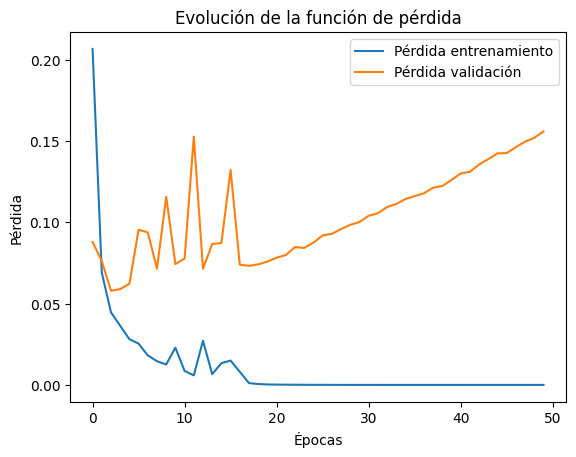

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9721 - loss: 0.1563  
Loss: 0.1558  |  Accuracy: 0.9760
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


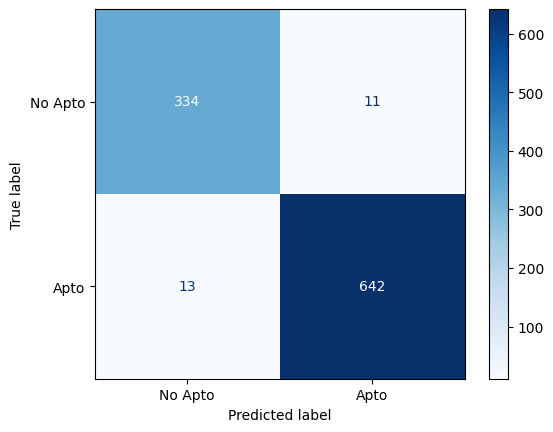

Sensitivity (Recall) por clase:
No Apto: 0.97
Apto: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Evaluación de nuevo candidato:
Resultado: Apto


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
# Celda 5: evaluar, visualizar matriz de confusión y predecir nuevo candidato

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
import numpy as np

# Gráfica pérdida entrenamiento vs validación
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

# Evaluación numérica final sobre X_test
loss, acc = modelo.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

# Predicción y matriz de confusión
pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

# Sensibilidad (recall) por clase
sensitivity = recall_score(y_true, y_pred, average=None)
print("Sensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

# ----- Probar un nuevo candidato -----
# Define nuevo candidato como array 1x18 (misma orden de columnas que df)
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas (6)
                             82, 86, 85, 83, 87, 80,   # matemáticas (6)
                             70, 75, 80, 72, 78, 74]]) # psicológicas (6)

# Escalar con el mismo scaler entrenado
nuevo_candidato_scaled = scaler.transform(nuevo_candidato)

# Predecir y mostrar resultado
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")
